<a href="https://colab.research.google.com/github/Qianru69/Wind-Prediction/blob/ERA5-EDA/ERA5_ERD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!pip install xarray

In [4]:
!pip install ecmwflibs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for findlibs: filename=findlibs-0.0.5-py3-none-any.whl size=6941 sha256=683545e1b7677044e6a1f91d3412942ccf80fac4aff8df57b4285b4fc39f906c
  Stored in directory: /root/.cache/pip/wheels/2e/67/14/22fa5b9fd9c41be520b37e908597d6a262803c0fcf2ba7c2c3
Successfully built findlibs


In [5]:
! pip install eccodes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eccodes: filename=eccodes-1.7.0-py3-none-any.whl size=41293 sha256=7f40326df67276465082277d3351d98b3057485bd86191de047a403381de5de0
  Stored in directory: /root/.cache/pip/wheels/44/16/96/7b9c3092abbd09c79444ba34e07106bc0992eb1c9e05fd58f3
Successfully built eccodes


In [6]:
#!pip install cfgrib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.6 MB/s eta 0:00:00


In [7]:
import cfgrib

ds = cfgrib.open_datasets('/content/drive/MyDrive/CS 663 - Project/Datasets/ERA5 Chicago/adaptor.mars.internal-1709239921.7896495-18802-1-e188be85-18a5-4050-8a59-fd1fb21ab652.grib')


In [8]:
ds

[<xarray.Dataset>
 Dimensions:     (time: 731, step: 12, latitude: 5, longitude: 5)
 Coordinates:
     number      int64 0
   * time        (time) datetime64[ns] 2022-12-31T18:00:00 ... 2023-12-31T18:0...
   * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 11:00:00 12:00:00
     surface     float64 0.0
   * latitude    (latitude) float64 42.0 41.75 41.5 41.25 41.0
   * longitude   (longitude) float64 -88.0 -87.75 -87.5 -87.25 -87.0
     valid_time  (time, step) datetime64[ns] 2022-12-31T19:00:00 ... 2024-01-0...
 Data variables:
     fg10        (time, step, latitude, longitude) float32 ...
     i10fg       (time, step, latitude, longitude) float32 ...
 Attributes:
     GRIB_edition:            1
     GRIB_centre:             ecmf
     GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             European Centre for Medium-Range Weather Forecasts,
 <xarray.Dataset>

## EDA Analysis of ERA5 Chicago wind dataset

Xarray dataset

In [9]:
# Load the dataset
data = ds[1]
data.head()

<xarray.Dataset>
Dimensions:     (time: 5, latitude: 5, longitude: 5)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2023-01-01 ... 2023-01-01T04:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 42.0 41.75 41.5 41.25 41.0
  * longitude   (longitude) float64 -88.0 -87.75 -87.5 -87.25 -87.0
    valid_time  (time) datetime64[ns] 2023-01-01 ... 2023-01-01T04:00:00
Data variables:
    u10         (time, latitude, longitude) float32 ...
    v10         (time, latitude, longitude) float32 ...
    t2m         (time, latitude, longitude) float32 ...
    u10n        (time, latitude, longitude) float32 ...
    v10n        (time, latitude, longitude) float32 ...
    u100        (time, latitude, longitude) float32 ...
    v100        (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [10]:
data.info()

xarray.Dataset {
dimensions:
	time = 8760 ;
	latitude = 5 ;
	longitude = 5 ;

variables:
	int64 number() ;
		number:long_name = ensemble member numerical id ;
		number:units = 1 ;
		number:standard_name = realization ;
	datetime64[ns] time(time) ;
		time:long_name = initial time of forecast ;
		time:standard_name = forecast_reference_time ;
	timedelta64[ns] step() ;
		step:long_name = time since forecast_reference_time ;
		step:standard_name = forecast_period ;
	float64 surface() ;
		surface:long_name = original GRIB coordinate for key: level(surface) ;
		surface:units = 1 ;
	float64 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:standard_name = latitude ;
		latitude:long_name = latitude ;
		latitude:stored_direction = decreasing ;
	float64 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:standard_name = longitude ;
		longitude:long_name = longitude ;
	datetime64[ns] valid_time(time) ;
		valid_time:standard_name = time ;
		valid_time:long_name =

In [11]:
variables = ['u10', 'v10', 'u10n', 'v10n', 'u100', 'v100']
data[variables].isnull().sum()

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    number   int64 0
    step     timedelta64[ns] 00:00:00
    surface  float64 0.0
Data variables:
    u10      int64 0
    v10      int64 0
    u10n     int64 0
    v10n     int64 0
    u100     int64 0
    v100     int64 0

In [12]:
df = data.to_dataframe()
df.describe()

,number,step,surface,u10,v10,t2m,u10n,v10n,u100,v100
count,219000.0,219000,219000.0,219000.000000,219000.000000,219000.000000,219000.000000,219000.000000,219000.000000,219000.000000
mean,0.0,0 days 00:00:00,0.0,0.622132,0.304051,284.919006,0.640873,0.235569,1.014724,0.679532
std,0.0,0 days 00:00:00,0.0,3.086184,3.386751,9.516692,3.039310,3.326887,4.628904,5.040663
min,0.0,0 days 00:00:00,0.0,-11.985611,-14.091766,251.916321,-12.054337,-14.259735,-16.480255,-16.619354
25%,0.0,0 days 00:00:00,0.0,-1.573391,-1.978062,276.988670,-1.399429,-1.905609,-2.296780,-2.993984
50%,0.0,0 days 00:00:00,0.0,0.437477,0.362274,284.541138,0.366241,0.299217,0.819092,0.552773
75%,0.0,0 days 00:00:00,0.0,2.609581,2.520210,292.892853,2.513081,2.375366,4.390354,4.235416
max,0.0,0 days 00:00:00,0.0,13.559189,14.158890,309.640869,13.643524,13.811386,17.061813,19.986176


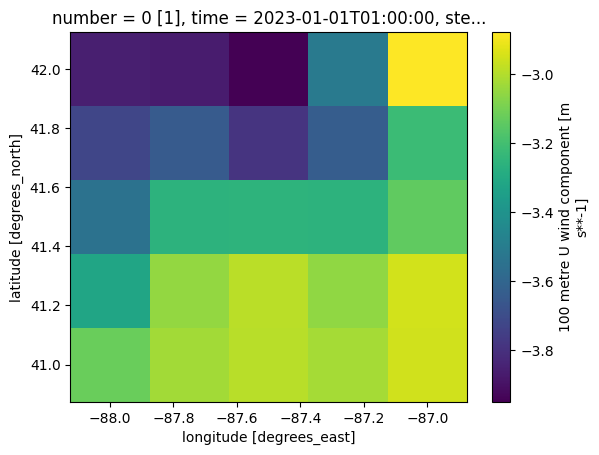

In [13]:
# Plot for a single time point
# by index
data.u100[1].plot()

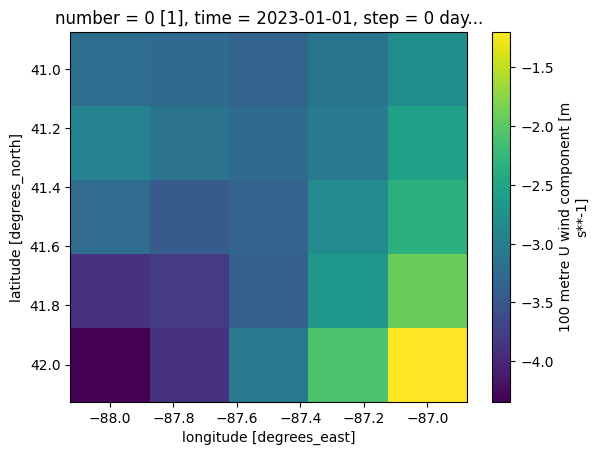

In [14]:
# Plot for a single time point
# By value
data.u100.sel(time='2023-01-01T00:00:00.000000000').plot(y='latitude', yincrease=False)

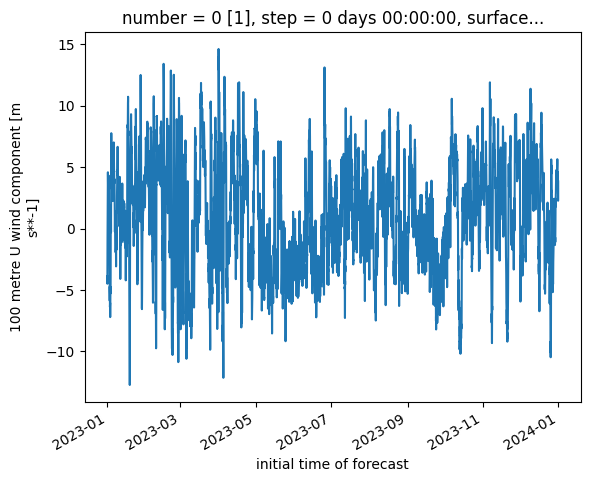

In [15]:
# Plot for all time point, but a single latitude x longitude
# with index
data.u100[:, 0, 0].plot()

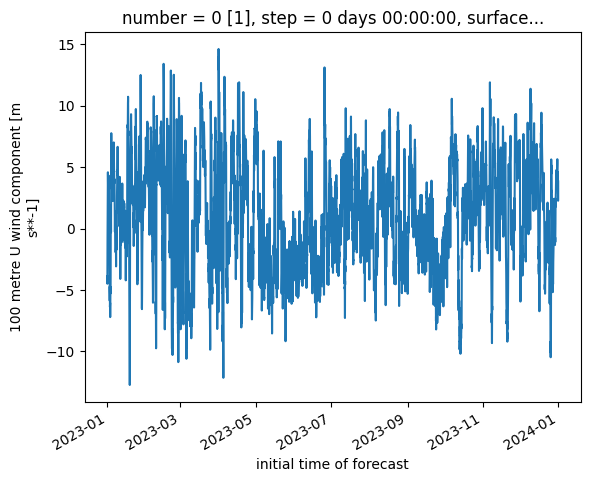

In [16]:
# Plot for all time point, but a single latitude x longitude
# with values
data.u100.sel(latitude=42, longitude =-88).plot()

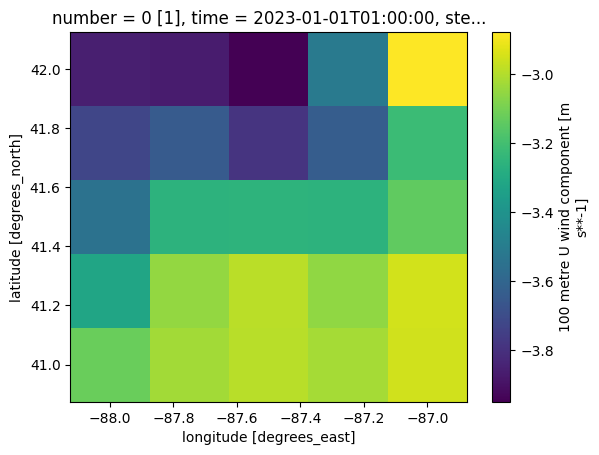

In [17]:
# Select a certain range of data
sliced = data.sel(time=slice('2023-01-01T00:00:00.000000000', '2023-02-01T00:00:00.000000000'))
sliced.u100[1].plot(x='longitude', y='latitude')

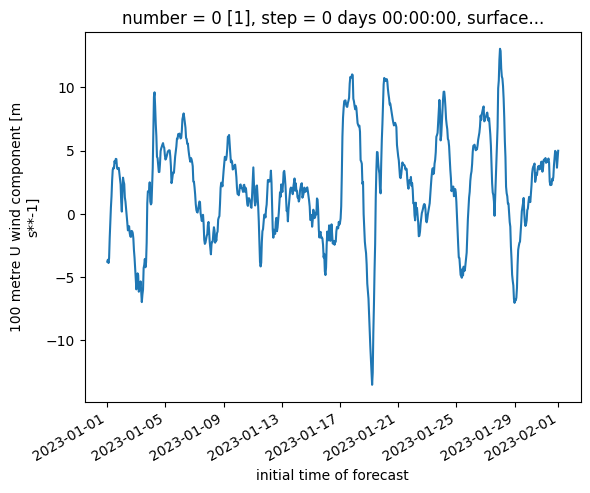

In [18]:
sliced.u100[:, 1, 1].plot()